In `heating_dependence_on_lts_moisture`, I produce plots of varying Q1 and Q2 for the mean within mid-tropospheric moisture (Q) and lower-tropospheric stability (LTS) bins **separately**. Since Q and LTS covary, it is important to study them in a two dimensional phase space. This notebook makes similar plots, but conditioned on a given value of "LTS".

# Version information

In [1]:
!git rev-parse HEAD
!git status

c57563fa3be24954cf324563beb92ce8e823b33e
On branch separate-qrad
Your branch is ahead of 'origin/separate-qrad' by 2 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   bin_data.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	2-vary-lts-moisture.ipynb
	convert_tom_binning_to_valid_format.py
	lrf.json
	lrf_old.json
	paper.ipynb
	../../paper/
	../../tmppuy0ean7/

no changes added to commit (use "git add" and/or "git commit -a")


# Functions

In [2]:
# Adjustments to path
import sys
%matplotlib inline
import xarray as xr
from functools import partial
import matplotlib.pyplot as plt
from plots.plot_binned import plot_line_by_key_altair

# Load Data

In [3]:
binned = xr.open_dataset("data/binned.nc")

# Plots

Scatter plot of LTS (x-axis) and mid tropospheric moisture (y-axis):

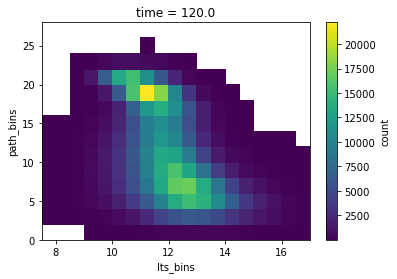

In [4]:
binned['count'].plot()
plt.savefig("bins-a.pdf")

Predicted $P-E$ for the profiles in each bin:

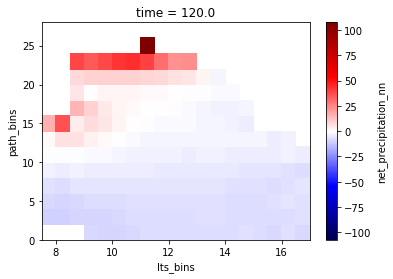

In [5]:
binned.net_precipitation_nn.plot(cmap='seismic')
plt.savefig('bins-b.pdf')

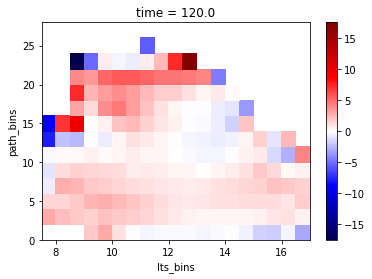

In [6]:
error = binned.net_precipitation_src - binned.net_precipitation_nn
error.plot(cmap='seismic')
plt.savefig('bins-c.pdf')

Predicted net heating for each bin:

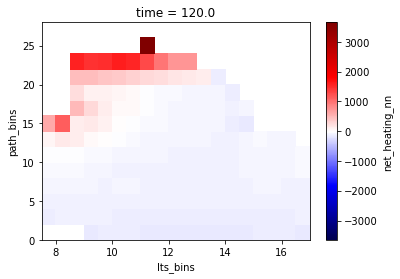

In [7]:
binned.net_heating_nn.plot(cmap='seismic')
plt.savefig('bins-d.pdf')

Predicted top-heaviness

The apparent heating and moistening for Q=22 mm, but varying LTS.

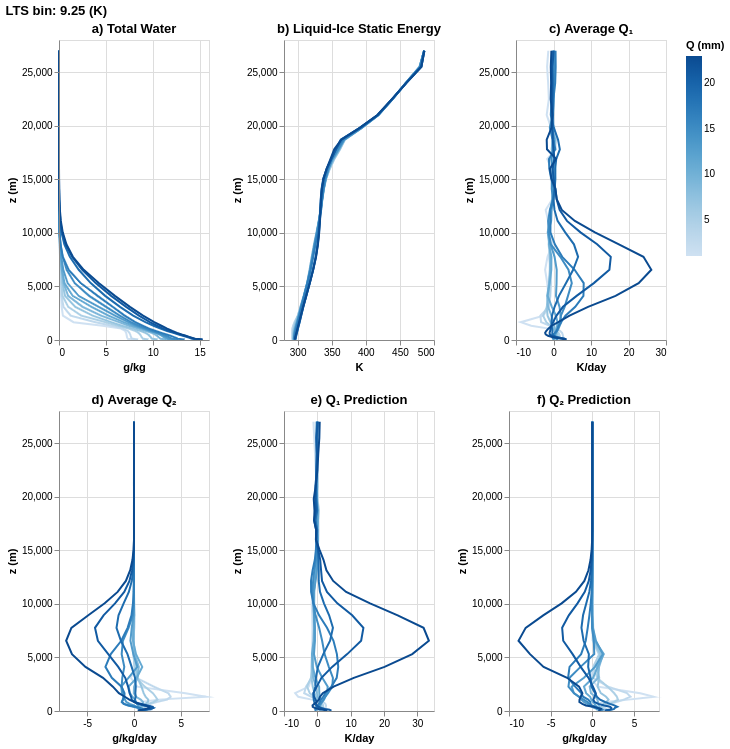

In [8]:
chart = plot_line_by_key_altair(binned.isel(lts_bins=3), 'path', c_title='Q (mm)',
                 title_fn=lambda x: f'LTS bin: {x.lts_bins.item()} (K)',
                 cmap='blues', c_sort="ascending")
chart.save("vary_q.svg")
chart

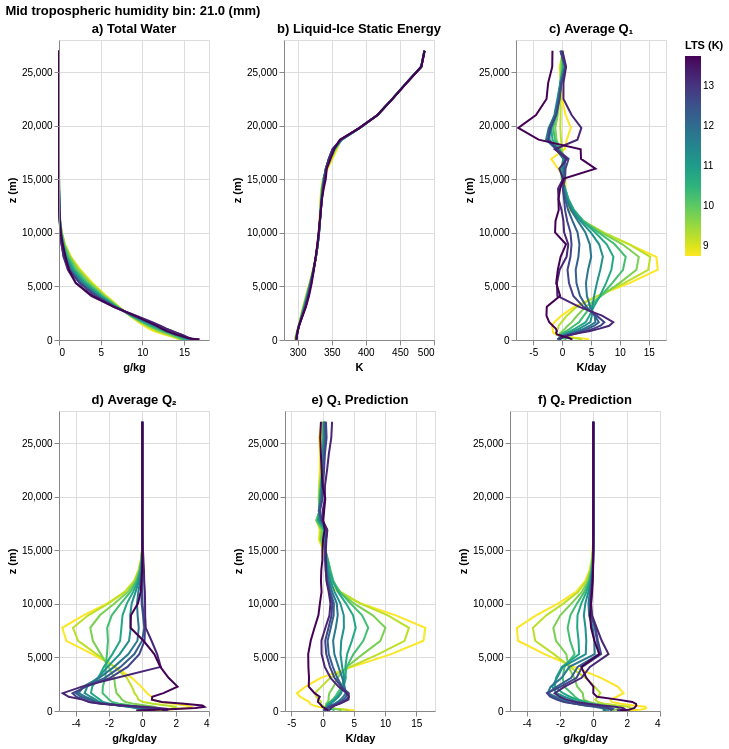

In [9]:
moist_margin = binned.isel(path_bins=10)
chart = plot_line_by_key_altair(moist_margin, 'lts', c_title='LTS (K)',
                 title_fn=lambda x: f'Mid tropospheric humidity bin: {x.path_bins.item()} (mm)', cmap='viridis')
chart.save("vary_lts.svg")
chart